Redo from : https://towardsdatascience.com/visualising-data-with-seaborn-who-pays-more-for-health-insurance-200d01892ba5

# Import librairies

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [2]:
df_insurance = pd.read_csv("data/insurance.csv")

In [3]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Transform data

In [26]:
#age categories : Youth (18-35), adults (36-54) and seniors (55 and above)
df_insurance["cat"] = ""
df_insurance["cat"].loc[df_insurance["age"] <= 35] = "youth"
df_insurance["cat"].loc[(df_insurance["age"] > 35) & (df_insurance["age"] <= 55)] = "adults"
df_insurance["cat"].loc[df_insurance["age"] > 55] = "seniors"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
df_insurance["cat"].value_counts()

youth      574
adults     548
seniors    216
Name: cat, dtype: int64

# Bar plot

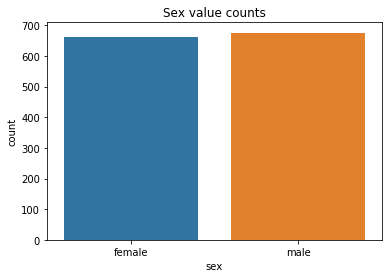

In [13]:
sns.countplot(df_insurance["sex"])
plt.title("Sex value counts")
plt.show()

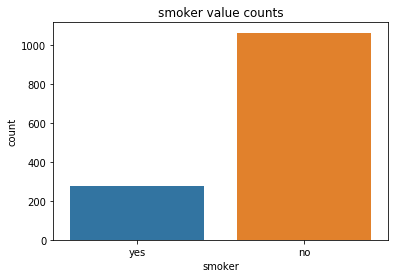

In [14]:
sns.countplot(df_insurance["smoker"])
plt.title("smoker value counts")
plt.show()

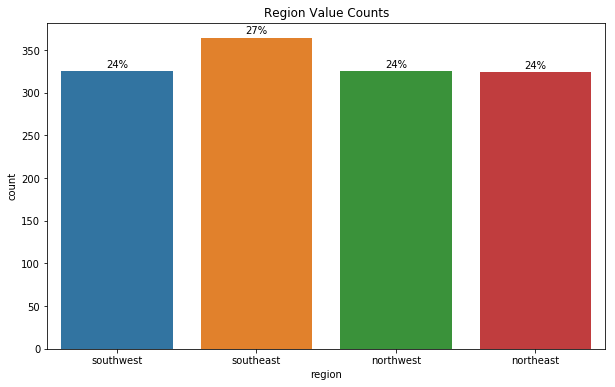

In [16]:
total = len(df_insurance)
plt.figure(figsize = (10, 6))
plt.title('Region Value Counts')
ax = sns.countplot(x = 'region', data = df_insurance)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

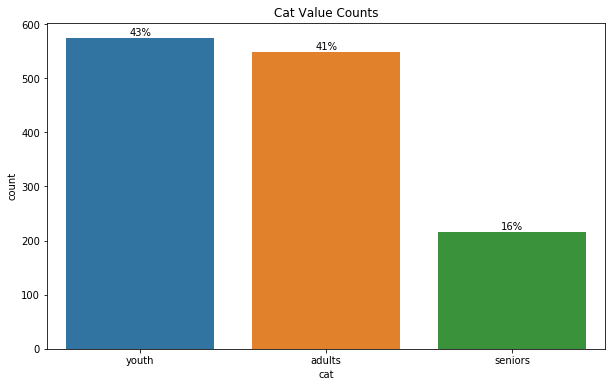

In [29]:
total = len(df_insurance)
plt.figure(figsize = (10, 6))
plt.title('Cat Value Counts')
ax = sns.countplot(x = 'cat', data = df_insurance)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

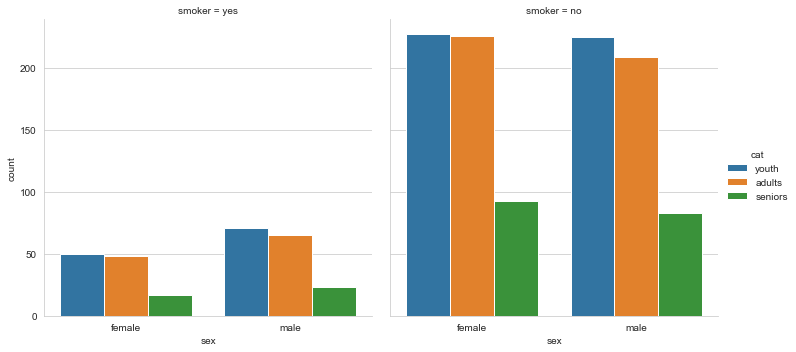

In [31]:
sns.set_style('whitegrid')
sns.catplot('sex', col = 'smoker', hue = 'cat', data = df_insurance, kind = 'count')

# Box plot

Text(0.5, 1.0, 'Charges by Smoking Habits')

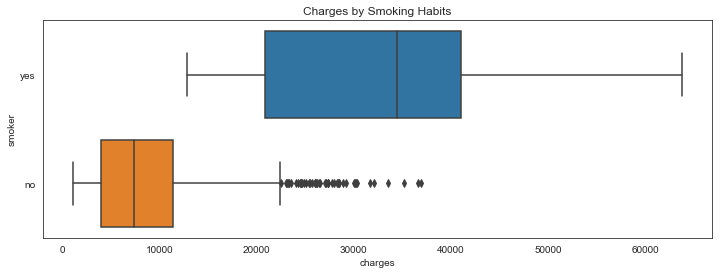

In [33]:
sns.set_style('white')
plt.figure(figsize = (12, 4))
sns.boxplot(y = df_insurance['smoker'], x = df_insurance['charges'])
plt.title('Charges by Smoking Habits')

Text(0.5, 1.0, 'Charges by Age Category')

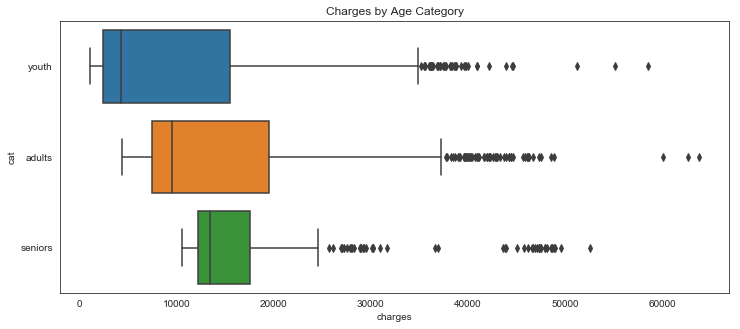

In [34]:
sns.set_style('white')
plt.figure(figsize = (12, 5))
sns.boxplot(y = df_insurance['cat'], x = df_insurance['charges'])
plt.title('Charges by Age Category')

# Distplot

Text(0.5, 1.0, 'BMI Distribution')

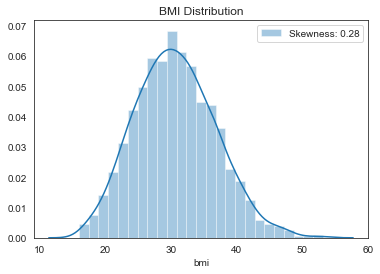

In [37]:
sns.set_style('white')
sns.distplot(df_insurance['bmi'], label = 'Skewness: %.2f'%(df_insurance['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('BMI Distribution')

# Heatmap

Text(0.5, 1.0, 'Correlation Between Numerical Variables')

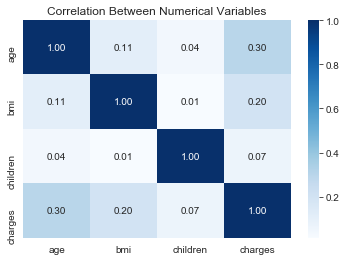

In [39]:
correlation = correlation = df_insurance[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation Between Numerical Variables')

# Scatterplot

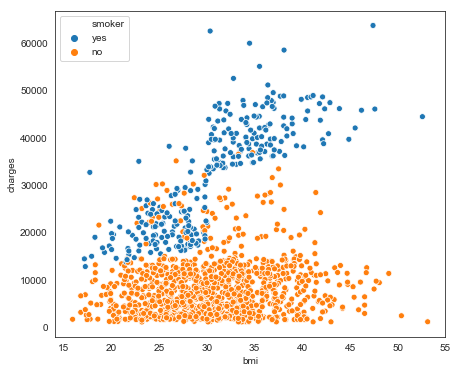

In [41]:
plt.figure(figsize = (7, 6))
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df_insurance)